<a href="https://colab.research.google.com/github/is0280fp/Gait/blob/main/test_proposed_cost_sensitive_learning_3DGRF_2DCOP_LSTM_5class_stratified_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

# Baseline

# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Mounted at /content/drive


In [2]:
# # StratifiedGroupKFoldの分割結果をpickle
import pickle

# test
with open("/content/drive/MyDrive/test_data/V_test.pickle", mode="rb") as f:
   test_V = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/AP_test.pickle", mode="rb") as f:
   test_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/ML_test.pickle", mode="rb") as f:
   test_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/COP_AP_test.pickle", mode="rb") as f:
   test_COP_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/COP_ML_test.pickle", mode="rb") as f:
   test_COP_ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/label_test.pickle", mode="rb") as f:
   test_label = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/test_data_index.pickle", mode="rb") as f:
   test_index = pickle.load(f)
f.close()

# trainig and validation
with open("/content/drive/MyDrive/test_data/V_val_train.pickle", mode="rb") as f:
   V = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/AP_val_train.pickle", mode="rb") as f:
   AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/ML_val_train.pickle", mode="rb") as f:
   ML = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/COP_AP_val_train.pickle", mode="rb") as f:
   COP_AP = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data/COP_ML_val_train.pickle", mode="rb") as f:
   COP_ML = pickle.load(f)
f.close()

# label
with open("/content/drive/MyDrive/test_data/train_idx_list.pickle", mode="rb") as f:
   train_index_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/val_idx_list.pickle", mode="rb") as f:
   val_index_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data/label_val_train.pickle", mode="rb") as f:
   label = pickle.load(f)
f.close()

In [ ]:
# import os
# print(os.getcwd())

# # os.chdir("C:\\Users\\clasi\\OneDrive\\デスクトップ\\test_data\\test_data\\")
# os.chdir("C:\\Users\\mm101\\Desktop\\test_data\\")

In [ ]:
# # # StratifiedGroupKFoldの分割結果をpickle
# import pickle

# # test
# with open("V_test.pickle", mode="rb") as f:
#    test_V = pickle.load(f)
# f.close()
# with open("AP_test.pickle", mode="rb") as f:
#    test_AP = pickle.load(f)
# f.close()
# with open("ML_test.pickle", mode="rb") as f:
#    test_ML = pickle.load(f)
# f.close()

# with open("COP_AP_test.pickle", mode="rb") as f:
#    test_COP_AP = pickle.load(f)
# f.close()
# with open("COP_ML_test.pickle", mode="rb") as f:
#    test_COP_ML = pickle.load(f)
# f.close()

# with open("label_test.pickle", mode="rb") as f:
#    test_label = pickle.load(f)
# f.close()

# # trainig and validation
# with open("V_val_train.pickle", mode="rb") as f:
#    V = pickle.load(f)
# f.close()
# with open("AP_val_train.pickle", mode="rb") as f:
#    AP = pickle.load(f)
# f.close()
# with open("ML_val_train.pickle", mode="rb") as f:
#    ML = pickle.load(f)
# f.close()

# with open("COP_AP_val_train.pickle", mode="rb") as f:
#    COP_AP = pickle.load(f)
# f.close()
# with open("COP_ML_val_train.pickle", mode="rb") as f:
#    COP_ML = pickle.load(f)
# f.close()

# # label
# with open("train_idx_list.pickle", mode="rb") as f:
#    train_index_list = pickle.load(f)
# f.close()

# with open("val_idx_list.pickle", mode="rb") as f:
#    val_index_list = pickle.load(f)
# f.close()

# with open("label_val_train.pickle", mode="rb") as f:
#    label = pickle.load(f)
# f.close()

# with open("test_sub_ID.pickle", mode="rb") as f:
#    sub_ID=pickle.load(f)
# f.close()

# import pandas as pd

# with open("test_data_index.pickle", mode="rb") as f:
#    test_index = pickle.load(f)
# f.close()

In [3]:
import numpy as np
print(np.where(label==0)[0].shape)
print(np.where(label==1)[0].shape)
print(np.where(label==2)[0].shape)
print(np.where(label==3)[0].shape)
print(np.where(label==4)[0].shape)

(13756,)
(11862,)
(17630,)
(18557,)
(14341,)


In [4]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler_LSTM = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1) 
mmscaler_CNN = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)

# LSTM
mmscaler_LSTM.fit(V)
V = mmscaler_LSTM.transform(V)
V = V.reshape(V.shape[0], V.shape[1], 1)

mmscaler_LSTM.fit(AP)
AP = mmscaler_LSTM.transform(AP)
AP = AP.reshape(AP.shape[0], AP.shape[1], 1)

mmscaler_LSTM.fit(ML)
ML = mmscaler_LSTM.transform(ML)
ML = ML.reshape(ML.shape[0], ML.shape[1], 1)

mmscaler_LSTM.fit(COP_AP)
COP_AP = mmscaler_LSTM.transform(COP_AP)
COP_AP = COP_AP.reshape(COP_AP.shape[0], COP_AP.shape[1], 1)

mmscaler_LSTM.fit(COP_ML)
COP_ML = mmscaler_LSTM.transform(COP_ML)
COP_ML = COP_ML.reshape(COP_ML.shape[0], COP_ML.shape[1], 1)

In [5]:
!pip install keras-layer-normalization
# !pip install keras-self-attention

  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.14.0-cp37-none-any.whl size=5269 sha256=6804fe730137dd8d1b905972e8de19c90d2019fb3608806f91560ffc8a6c6f5d
  Stored in directory: /root/.cache/pip/wheels/54/80/22/a638a7d406fd155e507aa33d703e3fa2612b9eb7bb4f4fe667
Successfully built keras-layer-normalization


In [6]:
from keras import optimizers, regularizers
from keras.initializers import he_normal
from keras.layers import ELU, Conv2D, MaxPooling2D, LSTM, InputLayer, Dense, Dropout, Activation, Flatten, concatenate, Conv1D, MaxPooling1D, Input, Reshape, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers.advanced_activations import PReLU
from keras.models import Model, Sequential
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from keras.layers.normalization import BatchNormalization
from keras_layer_normalization import LayerNormalization
# from keras_self_attention import SeqSelfAttention
import numpy as np
import keras
from sklearn.utils import class_weight
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import datetime

NAME = "practice_original_cost_sensitive_LSTM"
i = 0

# 共通
now = datetime.datetime.now()

# early stopping
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        patience=10,
                )

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 90 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

lr_scheduler = LearningRateScheduler(decay_schedule)

initializer = he_normal()

classes_main = 5

#LSTM-----------------------------------------------------------------------------------------------------------------------
def build_model():
  # LSTM
  # 最初これだけだった
  model = Sequential()
  model.add(InputLayer(input_shape=(101, 5)))

  model.add(Bidirectional(LSTM(512, return_sequences=True)))
  # model.add(LSTM(256, return_sequences=True))
  model.add(LayerNormalization())
  model.add(Activation('tanh'))
  model.add(Dropout(0.5))
  
  model.add(Flatten())

  model.add(Dense(512, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(256, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(128, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(64, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # model.add(Dropout(0.5))

  model.add(Dense(classes_main, kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add(Activation('softmax'))

  model.summary()
  return model
#------------------------------------------------------------------------------------------------------------------------------------------------------

# k-fold目のモデルのval_accuracyとval_lossのログ
history = []
# 混合行列のログ
cmx_list = []
# F1などスコアのログ
report_list = []

# EPOCHS = 500

val_label_list = []
train_label_list = []

val_LSTM_data_list = []
train_LSTM_data_list = []

i = 0
for i in range(7):
  train_index = train_index_list[i]
  train_LSTM_data = np.concatenate([V[train_index], AP[train_index], ML[train_index], COP_AP[train_index], COP_ML[train_index]], axis=2)
  val_index = val_index_list[i]
  val_LSTM_data = np.concatenate([V[val_index], AP[val_index], ML[val_index], COP_AP[val_index], COP_ML[val_index]], axis=2)
  
  # label
  train_label = label[train_index] 
  val_label= label[val_index] 

  # シャッフル
  p = np.random.permutation(len(train_label))
  train_LSTM_data = train_LSTM_data[p]
  train_label = train_label[p]

  p = np.random.permutation(len(val_label))
  val_LSTM_data = val_LSTM_data[p]
  val_label = val_label[p]

  # MAX = len(train_LSTM_data)

  # if i == 0:
  #   BATCH_SIZE = 55
  #   # train_LSTM_data = train_LSTM_data[:-3]
  #   # train_label = train_label[:-3]

  # elif i == 1:
  #   BATCH_SIZE = 55
  #   train_LSTM_data = train_LSTM_data[:-1]
  #   train_label = train_label[:-1]

  # elif i == 2:
  #   BATCH_SIZE = 55
  #   train_LSTM_data = train_LSTM_data[:-1]
  #   train_label = train_label[:-1]

  # elif i == 3:
  #   BATCH_SIZE = 55
  #   train_LSTM_data = train_LSTM_data[:-1]
  #   train_label = train_label[:-1]

  # elif i == 4:
  #   BATCH_SIZE = 55
  #   train_LSTM_data = train_LSTM_data[:-1]
  #   train_label = train_label[:-1]




  train_label = keras.utils.to_categorical(train_label, classes_main)
  val_label = keras.utils.to_categorical(val_label, classes_main)

  train_LSTM_data_list.append(train_LSTM_data)
  val_LSTM_data_list.append(val_LSTM_data)

  val_label_list.append(val_label)
  train_label_list.append(train_label)

  print("train_data", train_LSTM_data.shape)
  print("val_data", val_LSTM_data.shape)
  i = i+1

train_data (65268, 101, 5)
val_data (10878, 101, 5)
train_data (65268, 101, 5)
val_data (10878, 101, 5)
train_data (65268, 101, 5)
val_data (10878, 101, 5)
train_data (65268, 101, 5)
val_data (10878, 101, 5)
train_data (65268, 101, 5)
val_data (10878, 101, 5)
train_data (65268, 101, 5)
val_data (10878, 101, 5)
train_data (65268, 101, 5)
val_data (10878, 101, 5)


In [7]:
from keras.layers import Lambda

def true_positive(sparse_yTrue, sparse_yPred, class_label):
  y_true = K.zeros(len(sparse_yTrue), 1)
  y_true = tf.where(sparse_yTrue == class_label, 1, y_true)
  y_pred = K.zeros(len(sparse_yPred), 1)
  y_pred= tf.where(sparse_yPred == class_label, 1, y_pred)

  return K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) # TP

def true_negative(sparse_yTrue, sparse_yPred, class_label):
  y_true = K.zeros(len(sparse_yTrue), 1)
  y_true = tf.where(sparse_yTrue == class_label, 1, y_true)
  y_pred = K.zeros(len(sparse_yPred), 1)
  y_pred= tf.where(sparse_yPred == class_label, 1, y_pred)

  y_pos = K.round(K.clip(y_true, 0, 1))
  # n_pos = K.sum(y_pos)
  y_neg = tf.convert_to_tensor(1 - y_pos)
  # n_neg = K.sum(y_neg)
  # n = n_pos + n_neg
  y_pred_pos = K.round(K.clip(y_pred, 0, 1))
  y_pred_neg = tf.convert_to_tensor(1 - y_pred_pos)
  return K.sum(K.round(K.clip(y_neg * y_pred_neg, 0, 1))) # TN

def false_positive(sparse_yTrue, sparse_yPred, class_label):
  y_true = K.zeros(len(sparse_yTrue), 1)
  y_true = tf.where(sparse_yTrue == class_label, 1, y_true)
  y_pred = K.zeros(len(sparse_yPred), 1)
  y_pred= tf.where(sparse_yPred == class_label, 1, y_pred)

  y_pos = K.round(K.clip(y_true, 0, 1))
  # n_pos = K.sum(y_pos)
  y_neg = tf.convert_to_tensor(1 - y_pos)
  # n_neg = K.sum(y_neg)
  # n = n_pos + n_neg
  return K.sum(K.round(K.clip(y_neg * y_pred, 0, 1))) # FP

def false_negative(sparse_yTrue, sparse_yPred, class_label):
  # print(len(sparse_yTrue))
  y_true = K.zeros(len(sparse_yTrue), 1)
  y_true = tf.where(sparse_yTrue == class_label, 1, y_true)
  y_pred = K.zeros(len(sparse_yPred), 1)
  y_pred= tf.where(sparse_yPred == class_label, 1, y_pred)

  y_pos = K.round(K.clip(y_true, 0, 1))
  # n_pos = K.sum(y_pos)
  y_neg = tf.convert_to_tensor(1 - y_pos)
  # n_neg = K.sum(y_neg)
  # n = n_pos + n_neg
  y_pred_pos = K.round(K.clip(y_pred, 0, 1))
  y_pred_neg = tf.convert_to_tensor(1 - y_pred_pos)
  return K.sum(K.round(K.clip(y_true * y_pred_neg, 0, 1))) # FN

def values(sparse_yTrue, sparse_yPred, class_label):
  TP = true_positive(sparse_yPred, sparse_yTrue, class_label)
  TN = true_negative(sparse_yPred, sparse_yTrue, class_label)
  FP = false_positive(sparse_yPred, sparse_yTrue, class_label)
  FN = false_negative(sparse_yPred, sparse_yTrue, class_label)
  
  # print("TP", TP)
  # print("FN", FN)
  # print("TN", TN)
  # print("FP", FP)
  # print("1/(TP+FN)", 1/(TP+FN))             # infになる、TP+FN = 0になるとき
  # print("1/(TN+FP)", 1/(TN+FP))             # infになる、TN+FP = 0になるとき
  
  # print(TP_FN)
  # print(TN_FP)
  cond_precision = tf.math.equal(TP, K.zeros(1))
  precision = tf.cond(cond_precision, lambda: K.zeros(1), lambda: tf.convert_to_tensor( TP/(TP+FP) ))

  cond_recall = tf.math.equal(TP, K.zeros(1))
  recall = tf.cond(cond_recall, lambda: K.zeros(1), lambda: tf.convert_to_tensor( TP/(TP+FN) ))

  return K.cast(tf.convert_to_tensor(recall), dtype='float64'), K.cast(tf.convert_to_tensor(precision), dtype='float64')
  # return K.cast(tf.convert_to_tensor(recall), dtype='float64')

In [8]:
from keras import backend as K

def miscost(yTrue, yPred):
  # print("yTrue.shape", yTrue.shape)
  # print("yPred.shape", yPred.shape)
  # print("yTrue", yTrue)
  # print("yPred", yPred)
  sparse_yTrue = K.argmax(yTrue, axis=1)           # (50, 1)
  sparse_yPred = K.argmax(yPred, axis=1)           # (50, 1)
  
  # # print("miscost_sparse_yTrue", sparse_yTrue)
  # # print("miscost_sparse_yPred", sparse_yPred)
  HC_num = K.cast(tf.convert_to_tensor(len(sparse_yTrue[sparse_yTrue==0])), dtype='float64')
  H_num = K.cast(tf.convert_to_tensor(len(sparse_yTrue[sparse_yTrue==1])), dtype='float64')
  K_num = K.cast(tf.convert_to_tensor(len(sparse_yTrue[sparse_yTrue==2])), dtype='float64')
  A_num = K.cast(tf.convert_to_tensor(len(sparse_yTrue[sparse_yTrue==3])), dtype='float64')
  C_num = K.cast(tf.convert_to_tensor(len(sparse_yTrue[sparse_yTrue==4])), dtype='float64')

  # HC_IR = tf.convert_to_tensor(HC_num/K.cast(len(sparse_yTrue[sparse_yTrue!=0]), dtype='float64'))
  # # HC_IR = tf.cast(HC_IR, dtype=tf.float64)
  # H_IR = tf.convert_to_tensor(H_num/K.cast(len(sparse_yTrue[sparse_yTrue!=1]), dtype='float64'))
  # # H_IR = tf.cast(H_IR, dtype=tf.float64)
  # K_IR = tf.convert_to_tensor(K_num/K.cast(len(sparse_yTrue[sparse_yTrue!=2]), dtype='float64'))
  # # K_IR = tf.cast(K_IR, dtype=tf.float64)
  # A_IR = tf.convert_to_tensor(A_num/K.cast(len(sparse_yTrue[sparse_yTrue!=3]), dtype='float64'))
  # # A_IR = tf.cast(A_IR, dtype=tf.float64)
  # C_IR = tf.convert_to_tensor(C_num/K.cast(len(sparse_yTrue[sparse_yTrue!=4]), dtype='float64'))
  # # C_IR = tf.cast(C_IR, dtype=tf.float64)

  _, HC_precision = values(sparse_yTrue, sparse_yPred, 0)
  H_recall, _ = values(sparse_yTrue, sparse_yPred, 1)
  K_recall, _ = values(sparse_yTrue, sparse_yPred, 2)
  A_recall, _ = values(sparse_yTrue, sparse_yPred, 3)
  C_recall, _ = values(sparse_yTrue, sparse_yPred, 4)

  # HC_acc = values(sparse_yTrue, sparse_yPred, 0)
  # H_acc = values(sparse_yTrue, sparse_yPred, 1)
  # K_acc = values(sparse_yTrue, sparse_yPred, 2)
  # A_acc = values(sparse_yTrue, sparse_yPred, 3)
  # C_acc = values(sparse_yTrue, sparse_yPred, 4)

  # HC_mis_cost = K.cast(tf.convert_to_tensor( HC_IR * K.exp(- HC_g_values / 2) * K.exp(- HC_acc / 2)), dtype='float64')
  # H_mis_cost =  K.cast(tf.convert_to_tensor( H_IR * K.exp(- H_g_values / 2) * K.exp(- H_acc / 2)), dtype='float64')
  # K_mis_cost = K.cast(tf.convert_to_tensor( K_IR * K.exp(- K_g_values / 2) * K.exp(- K_acc / 2)), dtype='float64')
  # A_mis_cost = K.cast(tf.convert_to_tensor(A_IR * K.exp(- A_g_values / 2) * K.exp(- A_acc / 2)), dtype='float64')
  # C_mis_cost = K.cast(tf.convert_to_tensor( C_IR * K.exp(- C_g_values / 2) * K.exp(- C_acc / 2)), dtype='float64')

  # HC_mis_cost = K.cast(tf.convert_to_tensor( K.exp(HC_g_values / 2) * K.exp((1- HC_acc) / 2)), dtype='float64')
  # H_mis_cost =  K.cast(tf.convert_to_tensor( K.exp(H_g_values / 2) * K.exp((1-H_acc) / 2)), dtype='float64')
  # K_mis_cost = K.cast(tf.convert_to_tensor( K.exp(K_g_values / 2) * K.exp((1-K_acc) / 2)), dtype='float64')
  # A_mis_cost = K.cast(tf.convert_to_tensor( K.exp(A_g_values / 2) * K.exp((1-A_acc) / 2)), dtype='float64')
  # C_mis_cost = K.cast(tf.convert_to_tensor( K.exp(C_g_values / 2) * K.exp((1-C_acc) / 2)), dtype='float64')

  HC_mis_cost = K.cast(tf.convert_to_tensor( K.exp((1- HC_precision) / 2)), dtype='float64')
  H_mis_cost =  K.cast(tf.convert_to_tensor( K.exp((1-H_recall) / 2)), dtype='float64')
  K_mis_cost = K.cast(tf.convert_to_tensor( K.exp((1-K_recall) / 2)), dtype='float64')
  A_mis_cost = K.cast(tf.convert_to_tensor( K.exp((1-A_recall) / 2)), dtype='float64')
  C_mis_cost = K.cast(tf.convert_to_tensor( K.exp((1-C_recall) / 2)), dtype='float64')
  return HC_mis_cost, H_mis_cost, K_mis_cost, A_mis_cost, C_mis_cost, HC_num, H_num, K_num, A_num, C_num, sparse_yTrue

In [9]:
class weighted_categorical_crossentropy(tf.keras.losses.CategoricalCrossentropy):
    
  def __init__(
      self,
      *,
      from_logits=False,
      label_smoothing=0,
      reduction=tf.keras.losses.Reduction.NONE,
      # reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE,
      name='categorical_crossentropy',
  ):

      super().__init__(
          from_logits, label_smoothing, reduction
      )

  def call(self, y_true, y_pred):
    HC_mis_cost, H_mis_cost, K_mis_cost, A_mis_cost, C_mis_cost, HC_num, H_num, K_num, A_num, C_num, sparse_yTrue = miscost(y_true, y_pred)
    loss = K.cast(super().call(y_true, y_pred), dtype='float64')
    loss_HC = tf.math.reduce_sum(tf.where(sparse_yTrue == 0, tf.convert_to_tensor(loss*HC_mis_cost), loss)) * (1 / (HC_num+1))
    loss_H = tf.math.reduce_sum(tf.where(sparse_yTrue == 1, tf.convert_to_tensor(loss*H_mis_cost), loss)) * (1 /(H_num+1))
    loss_K = tf.math.reduce_sum(tf.where(sparse_yTrue == 2, tf.convert_to_tensor(loss*K_mis_cost), loss)) * (1 / (K_num+1))
    loss_A = tf.math.reduce_sum(tf.where(sparse_yTrue == 3, tf.convert_to_tensor(loss*A_mis_cost), loss)) * (1 / (A_num+1))
    loss_C = tf.math.reduce_sum(tf.where(sparse_yTrue == 4, tf.convert_to_tensor(loss*C_mis_cost), loss)) * (1 / (C_num+1))
    # loss_HC = tf.math.reduce_sum(tf.where(sparse_yTrue == 0, tf.convert_to_tensor(loss*HC_mis_cost), loss)) * (1 / 55)
    # loss_H = tf.math.reduce_sum(tf.where(sparse_yTrue == 1, tf.convert_to_tensor(loss*H_mis_cost), loss)) * (1 / 55)
    # loss_K = tf.math.reduce_sum(tf.where(sparse_yTrue == 2, tf.convert_to_tensor(loss*K_mis_cost), loss)) * (1 / 55)
    # loss_A = tf.math.reduce_sum(tf.where(sparse_yTrue == 3, tf.convert_to_tensor(loss*A_mis_cost), loss)) * (1 / 55)
    # loss_C = tf.math.reduce_sum(tf.where(sparse_yTrue == 4, tf.convert_to_tensor(loss*C_mis_cost), loss)) * (1 / 55)
    # print("HC_num", HC_num)
    # print("H_num", H_num)
    # print("K_num", K_num)
    # print("A_num", A_num)
    # print("C_num", C_num)
    # return K.concatenate( [loss_HC, loss_H, loss_K, loss_A, loss_C], axis=0)
    return tf.convert_to_tensor(loss_HC + loss_H + loss_K + loss_A + loss_C)
    # return tf.reduce_sum(K.cast(super().call(y_true, y_pred), dtype='float64')) * (1. / 55)

In [10]:
tf.config.run_functions_eagerly(True)
# tf.config.run_functions_eagerly(False)

In [ ]:
for i in range(0, 1):
  print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
  print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
  print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
  print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
  print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

  # checkpointの設定
  checkpoint = ModelCheckpoint(
                    filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                      monitor='val_loss',
                      save_best_only=True,
                      period=1,
                      verbose=1
                  )

  model = build_model()
  model.compile(
      loss= weighted_categorical_crossentropy(),
      # loss = custom_cross_entropy,
      optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
      metrics=['acc'],
      # class_weight=class_weight
            )

  result = model.fit(
      x=train_LSTM_data_list[i], 
      y=train_label_list[i], 
      batch_size=63, 
      epochs=400, 
      verbose=1,
      validation_data=(
          val_LSTM_data_list[i], 
          val_label_list[i]
            ),
      callbacks=[early_stopping, checkpoint, lr_scheduler]
      )
  
  print("results per {}-fold".format(i))
  history.append(model.evaluate(
      x=val_LSTM_data_list[i], 
      y=val_label_list[i], 
      verbose=1))
 # save weights
  # file_name = "{}fold_{}".format(i, NAME)
  # model.save(file_name+'.h5')

    # 混合行列
  predict_prob = model.predict(val_LSTM_data_list[i])
  predict_classes=np.argmax(predict_prob,axis=1)
  true_classes = val_label_list[i]
  true_classes=np.argmax(true_classes, axis=1)
  cmx = confusion_matrix(true_classes, predict_classes)
  cmx_list.append(cmx)
  print(cmx)

  index = ["HC", "a_H", "a_K", "a_A", "a_C"]

  report = classification_report(true_classes, predict_classes, target_names=index)
  report_list.append(report)
  print(report)

  cmx_data = []
  for i in range(len(cmx)):
    for j in range(len(cmx)): 
      cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

  cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

  ax= plt.subplot()
  sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(index) 
  ax.yaxis.set_ticklabels(index)
  plt.show()

  i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

HC (11644,)
H (9971,)
K (15293,)
A (16092,)
C (12268,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
b

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1036/1036 [==============================] - 192s 155ms/step - loss: 40.9770 - acc: 0.3726 - val_loss: 32.0288 - val_acc: 0.5001

Epoch 00001: val_loss improved from inf to 32.02881, saving model to drive/MyDrive/saved_models/checkpoints/1fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 164s 159ms/step - loss: 31.3991 - acc: 0.5320 - val_loss: 29.2712 - val_acc: 0.5703

Epoch 00002: val_loss improved from 32.02881 to 29.27117, saving model to drive/MyDrive/saved_models/checkpoints/1fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 166s 160ms/step - loss: 27.7240 - acc: 0.6074 - val_loss: 27.3301 - val_acc: 0.6064

Epoch 00003: val_loss improved from 29.27117 to 27.33010, saving model to drive/MyDrive/saved_models/checkpoints/1fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [==============================] - 164s 158ms/step - loss: 25.5062 - acc: 0.6575 - val_lo

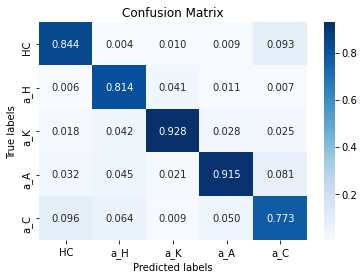

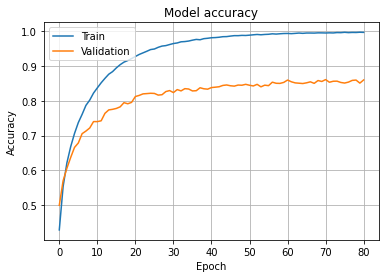

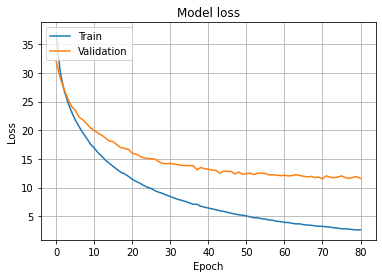

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 80 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 1

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
# model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/0fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 20 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 2

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/add_20steps_1e-5_{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
# model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/0fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

HC (11736,)
H (9990,)
K (15491,)
A (15652,)
C (12399,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/400
1036/1036 [==============================] - 160s 155ms/step - loss: 42.4766 - acc: 0.3565 - val_loss: 33.5394 - val_acc: 0.5162

Epoch 00001: val_loss improved from inf to 33.53944, saving model to drive/MyDrive/saved_models/checkpoints/add_20steps_1e-5_2fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 163s 158ms/step - loss: 32.4139 - acc: 0.5198 - val_loss: 30.3857 - val_acc: 0.5579

Epoch 00002: val_loss improved from 33.53944 to 30.38566, saving model to drive/MyDrive/saved_models/checkpoints/add_20steps_1e-5_2fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 162s 157ms/step - loss: 28.6274 - acc: 0.5935 - val_loss: 28.0854 - val_acc: 0.6001

Epoch 00003: val_loss improved from 30.38566 to 28.08543, saving model to drive/MyDrive/saved_models/checkpoints/add_20steps_1e-5_2fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [=========================

HC (11736,)
H (9990,)
K (15491,)
A (15652,)
C (12399,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/400
1036/1036 [==============================] - 191s 154ms/step - loss: 1.8719 - acc: 0.9983 - val_loss: 9.1840 - val_acc: 0.8946

Epoch 00001: val_loss improved from inf to 9.18399, saving model to drive/MyDrive/saved_models/checkpoints/add_20steps_1e-5_2fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 161s 155ms/step - loss: 1.9109 - acc: 0.9980 - val_loss: 9.2965 - val_acc: 0.8887

Epoch 00002: val_loss did not improve from 9.18399
Epoch 3/400
1036/1036 [==============================] - 159s 154ms/step - loss: 1.8583 - acc: 0.9985 - val_loss: 9.2353 - val_acc: 0.8910

Epoch 00003: val_loss did not improve from 9.18399
Epoch 4/400
1036/1036 [==============================] - 159s 154ms/step - loss: 1.8892 - acc: 0.9984 - val_loss: 9.2345 - val_acc: 0.8913

Epoch 00004: val_loss did not improve from 9.18399
Epoch 5/400
1036/1036 [==============================] - 160s 154ms/step - loss: 1.8820 - acc: 0.9981 - val_loss: 9.

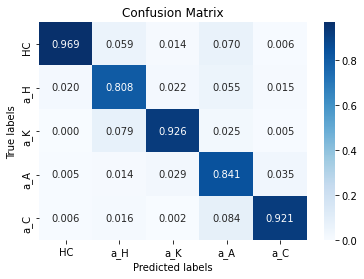

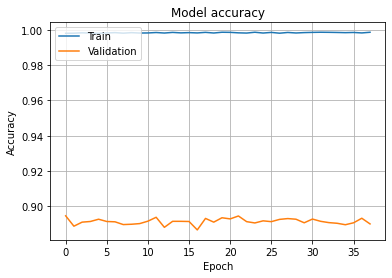

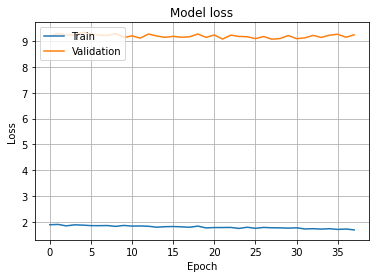

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 58 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 2

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/add_20steps_1e-5_{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/add_20steps_1e-5_2fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-6, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

In [ ]:
def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 80 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

for i in range(3, 7):

  # print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
  # print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
  # print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
  # print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
  # print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

  # checkpointの設定
  checkpoint = ModelCheckpoint(
                    filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                      monitor='val_loss',
                      save_best_only=True,
                      period=1,
                      verbose=1
                  )

  model = build_model()
  # model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/0fold_practice_original_cost_sensitive_LSTM.h5')
  model.compile(
      loss= weighted_categorical_crossentropy(),
      # loss = custom_cross_entropy,
      optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
      metrics=['acc'],
      # class_weight=class_weight
            )

  result = model.fit(
      x=train_LSTM_data_list[i], 
      y=train_label_list[i], 
      batch_size=63, 
      epochs=400, 
      verbose=1,
      validation_data=(
          val_LSTM_data_list[i], 
          val_label_list[i]
            ),
      callbacks=[early_stopping, checkpoint, lr_scheduler]
      )

  print("results per {}-fold".format(i))
  history.append(model.evaluate(
      x=val_LSTM_data_list[i], 
      y=val_label_list[i], 
      verbose=1))
  # save weights
  # file_name = "{}fold_{}".format(i, NAME)
  # model.save(file_name+'.h5')

    # 混合行列
  predict_prob = model.predict(val_LSTM_data_list[i])
  predict_classes=np.argmax(predict_prob,axis=1)
  true_classes = val_label_list[i]
  true_classes=np.argmax(true_classes, axis=1)
  cmx = confusion_matrix(true_classes, predict_classes)
  cmx_list.append(cmx)
  print(cmx)

  index = ["HC", "a_H", "a_K", "a_A", "a_C"]

  report = classification_report(true_classes, predict_classes, target_names=index)
  report_list.append(report)
  print(report)

  cmx_data = []
  for i in range(len(cmx)):
    for j in range(len(cmx)): 
      cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

  cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

  ax= plt.subplot()
  sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(index) 
  ax.yaxis.set_ticklabels(index)
  plt.show()

  i = i + 1



  plt.plot(result.history['acc'])
  plt.plot(result.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.grid()
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(result.history['loss'])
  plt.plot(result.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.grid()
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # now = datetime.datetime.now()
  # with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
  #    pickle.dump(cmx_list, f)
  # f.close()

  # with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
  #    pickle.dump(report_list, f)
  # f.close()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1036/1036 [==============================] - 163s 157ms/step - loss: 41.0871 - acc: 0.3745 - val_loss: 33.2616 - val_acc: 0.5404

Epoch 00001: val_loss improved from inf to 33.26159, saving model to drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 165s 160ms/step - loss: 31.4722 - acc: 0.5316 - val_loss: 30.4506 - val_acc: 0.5970

Epoch 00002: val_loss improved from 33.26159 to 30.45062, saving model to drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 165s 159ms/step - loss: 28.1563 - acc: 0.5972 - val_loss: 28.1285 - val_acc: 0.6294

Epoch 00003: val_loss improved from 30.45062 to 28.12852, saving model to drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [==============================] - 165s 160ms/step - loss: 25.5593 - acc: 0.6539 - val_lo

HC (12396,)
H (10200,)
K (14405,)
A (16112,)
C (12155,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/400
1036/1036 [==============================] - 200s 163ms/step - loss: 5.8092 - acc: 0.9831 - val_loss: 14.6211 - val_acc: 0.8268

Epoch 00001: val_loss improved from inf to 14.62112, saving model to drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 171s 165ms/step - loss: 5.7047 - acc: 0.9839 - val_loss: 14.4911 - val_acc: 0.8231

Epoch 00002: val_loss improved from 14.62112 to 14.49113, saving model to drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 172s 166ms/step - loss: 5.5352 - acc: 0.9853 - val_loss: 14.0357 - val_acc: 0.8368

Epoch 00003: val_loss improved from 14.49113 to 14.03571, saving model to drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [==============================] - 170s 164ms/step - loss: 5.3859 - acc: 0.9862 

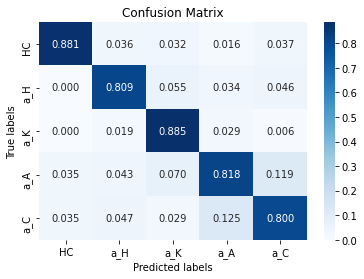

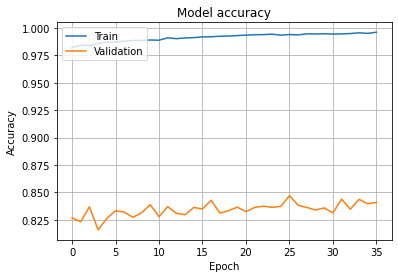

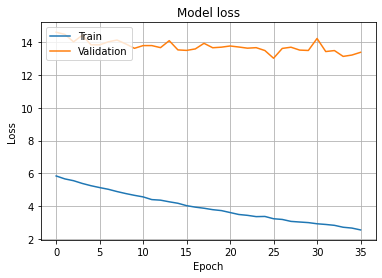

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 37 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 3

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

HC (11732,)
H (10284,)
K (15374,)
A (15728,)
C (12150,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1036/1036 [==============================] - 166s 160ms/step - loss: 41.3241 - acc: 0.3659 - val_loss: 32.7717 - val_acc: 0.5042

Epoch 00001: val_loss improved from inf to 32.77171, saving model to drive/MyDrive/saved_models/checkpoints/4fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 173s 167ms/step - loss: 31.4800 - acc: 0.5333 - val_loss: 29.2247 - val_acc: 0.5900

Epoch 00002: val_loss improved from 32.77171 to 29.22467, saving model to drive/MyDrive/saved_models/checkpoints/4fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 170s 164ms/step - loss: 28.2038 - acc: 0.6034 - val_loss: 27.1793 - val_acc: 0.6088

Epoch 00003: val_loss improved from 29.22467 to 27.17927, saving model to drive/MyDrive/saved_models/checkpoints/4fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [==============================] - 170s 164ms/step - loss: 25.8344 - acc: 0.6498 - val_lo

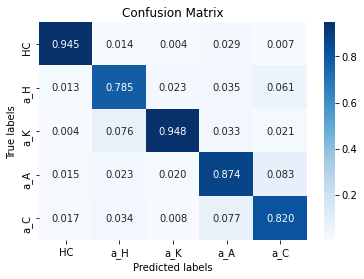

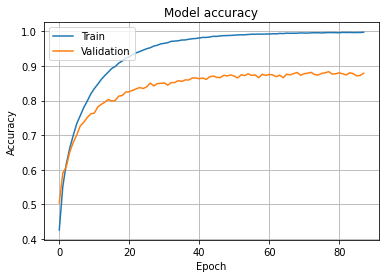

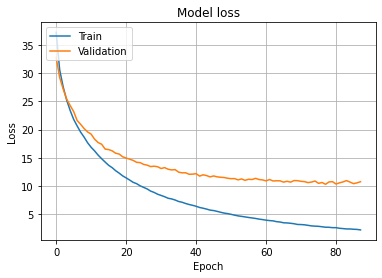

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 80 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 4

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
# model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 80 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 5

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
# model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

HC (11496,)
H (10032,)
K (15224,)
A (15958,)
C (12558,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_2 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_12 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               52953600  
________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1036/1036 [==============================] - 170s 164ms/step - loss: 41.6595 - acc: 0.3516 - val_loss: 32.5016 - val_acc: 0.5270

Epoch 00001: val_loss improved from inf to 32.50156, saving model to drive/MyDrive/saved_models/checkpoints/5fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 171s 165ms/step - loss: 32.0137 - acc: 0.5214 - val_loss: 29.0390 - val_acc: 0.6000

Epoch 00002: val_loss improved from 32.50156 to 29.03902, saving model to drive/MyDrive/saved_models/checkpoints/5fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 171s 165ms/step - loss: 28.6379 - acc: 0.5912 - val_loss: 26.4634 - val_acc: 0.6503

Epoch 00003: val_loss improved from 29.03902 to 26.46335, saving model to drive/MyDrive/saved_models/checkpoints/5fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [==============================] - 172s 166ms/step - loss: 26.2489 - acc: 0.6412 - val_lo

HC (11496,)
H (10032,)
K (15224,)
A (15958,)
C (12558,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/400
1036/1036 [==============================] - 201s 164ms/step - loss: 2.7148 - acc: 0.9965 - val_loss: 11.0655 - val_acc: 0.8713

Epoch 00001: val_loss improved from inf to 11.06547, saving model to drive/MyDrive/saved_models/checkpoints/5fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 172s 166ms/step - loss: 2.6948 - acc: 0.9953 - val_loss: 11.3759 - val_acc: 0.8627

Epoch 00002: val_loss did not improve from 11.06547
Epoch 3/400
1036/1036 [==============================] - 168s 163ms/step - loss: 2.6474 - acc: 0.9954 - val_loss: 11.0781 - val_acc: 0.8696

Epoch 00003: val_loss did not improve from 11.06547
Epoch 4/400
1036/1036 [==============================] - 168s 162ms/step - loss: 2.5657 - acc: 0.9963 - val_loss: 11.5507 - val_acc: 0.8666

Epoch 00004: val_loss did not improve from 11.06547
Epoch 5/400
1036/1036 [==============================] - 170s 164ms/step - loss: 2.5207 - acc: 0.9960 - val_loss: 11.3532 - v

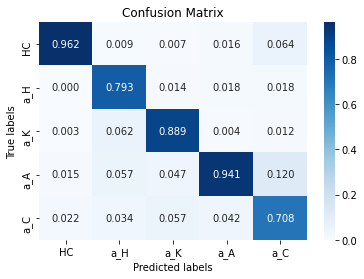

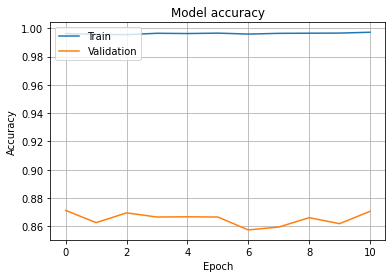

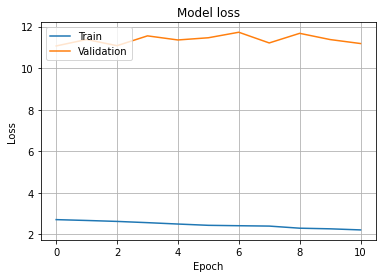

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 3 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 5

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/5fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

In [ ]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 80 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 6

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
# model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

HC (11580,)
H (10322,)
K (14841,)
A (16064,)
C (12461,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_1 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_6 (Activation)    (None, 101, 1024)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               52953600  
________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1036/1036 [==============================] - 169s 163ms/step - loss: 41.4118 - acc: 0.3596 - val_loss: 32.9770 - val_acc: 0.5101

Epoch 00001: val_loss improved from inf to 32.97698, saving model to drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 171s 165ms/step - loss: 31.7780 - acc: 0.5304 - val_loss: 29.4853 - val_acc: 0.5856

Epoch 00002: val_loss improved from 32.97698 to 29.48532, saving model to drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 172s 166ms/step - loss: 28.0975 - acc: 0.6007 - val_loss: 27.5269 - val_acc: 0.6007

Epoch 00003: val_loss improved from 29.48532 to 27.52686, saving model to drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [==============================] - 171s 165ms/step - loss: 25.6762 - acc: 0.6508 - val_lo

HC (11580,)
H (10322,)
K (14841,)
A (16064,)
C (12461,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/400
1036/1036 [==============================] - 193s 156ms/step - loss: 12.9771 - acc: 0.9002 - val_loss: 15.1577 - val_acc: 0.8206

Epoch 00001: val_loss improved from inf to 15.15766, saving model to drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5
Epoch 2/400
1036/1036 [==============================] - 163s 157ms/step - loss: 12.4154 - acc: 0.9097 - val_loss: 14.8040 - val_acc: 0.8259

Epoch 00002: val_loss improved from 15.15766 to 14.80395, saving model to drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5
Epoch 3/400
1036/1036 [==============================] - 164s 158ms/step - loss: 12.1167 - acc: 0.9152 - val_loss: 14.7214 - val_acc: 0.8343

Epoch 00003: val_loss improved from 14.80395 to 14.72143, saving model to drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5
Epoch 4/400
1036/1036 [==============================] - 163s 158ms/step - loss: 11.6827 - acc: 0.9

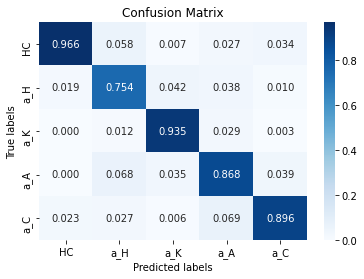

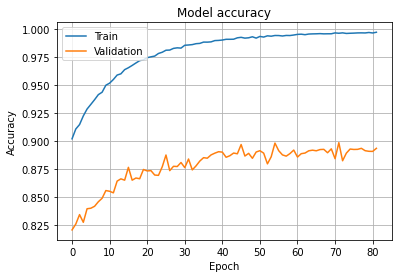

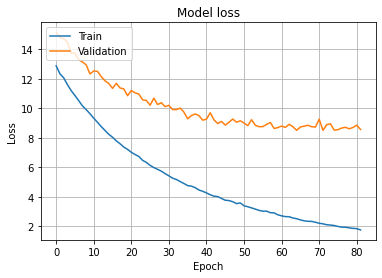

In [11]:
# for i in range(0, 7):

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 67 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

i = 6

print("HC", np.where(np.argmax(train_label_list[i], axis=1)==0)[0].shape)
print("H", np.where(np.argmax(train_label_list[i], axis=1)==1)[0].shape)
print("K", np.where(np.argmax(train_label_list[i], axis=1)==2)[0].shape)
print("A", np.where(np.argmax(train_label_list[i], axis=1)==3)[0].shape)
print("C", np.where(np.argmax(train_label_list[i], axis=1)==4)[0].shape)

# checkpointの設定
checkpoint = ModelCheckpoint(
                  filepath="drive/MyDrive/saved_models/checkpoints/{}fold_{}.h5".format(i, NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                    verbose=1
                )

model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(
    loss= weighted_categorical_crossentropy(),
    # loss = custom_cross_entropy,
    optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
    metrics=['acc'],
    # class_weight=class_weight
          )

result = model.fit(
    x=train_LSTM_data_list[i], 
    y=train_label_list[i], 
    batch_size=63, 
    epochs=400, 
    verbose=1,
    validation_data=(
        val_LSTM_data_list[i], 
        val_label_list[i]
          ),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
    )

print("results per {}-fold".format(i))
history.append(model.evaluate(
    x=val_LSTM_data_list[i], 
    y=val_label_list[i], 
    verbose=1))
# save weights
# file_name = "{}fold_{}".format(i, NAME)
# model.save(file_name+'.h5')

  # 混合行列
predict_prob = model.predict(val_LSTM_data_list[i])
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = val_label_list[i]
true_classes=np.argmax(true_classes, axis=1)
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data, annot=True, ax = ax, fmt="1.3f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

i = i + 1



plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# now = datetime.datetime.now()
# with open("cmx_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(cmx_list, f)
# f.close()

# with open("classification_report_{}_{}.pickle".format(NAME, now.strftime('%Y%m%d_%H%M%S')), mode="wb") as f:
#    pickle.dump(report_list, f)
# f.close()

In [12]:
# min_max normalizationする場合
from sklearn import preprocessing
mmscaler_LSTM = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1) 
# mmscaler_CNN = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)

# LSTM
mmscaler_LSTM.fit(test_V)
test_V = mmscaler_LSTM.transform(test_V)
test_V = test_V.reshape(test_V.shape[0], test_V.shape[1], 1)

mmscaler_LSTM.fit(test_AP)
test_AP = mmscaler_LSTM.transform(test_AP)
test_AP = test_AP.reshape(test_AP.shape[0], test_AP.shape[1], 1)

mmscaler_LSTM.fit(test_ML)
test_ML = mmscaler_LSTM.transform(test_ML)
test_ML = test_ML.reshape(test_ML.shape[0], test_ML.shape[1], 1)

mmscaler_LSTM.fit(test_COP_AP)
test_COP_AP = mmscaler_LSTM.transform(test_COP_AP)
test_COP_AP = test_COP_AP.reshape(test_COP_AP.shape[0], test_COP_AP.shape[1], 1)

mmscaler_LSTM.fit(test_COP_ML)
test_COP_ML = mmscaler_LSTM.transform(test_COP_ML)
test_COP_ML = test_COP_ML.reshape(test_COP_ML.shape[0], test_COP_ML.shape[1], 1)

test_x = np.concatenate([test_V[test_index], test_AP[test_index],  test_ML[test_index], test_COP_AP[test_index]], axis=2)
test_y = test_label[test_index]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization (LayerNo (None, 101, 1024)         2048      
_________________________________________________________________
activation (Activation)      (None, 101, 1024)         0         
_________________________________________________________________
dropout (Dropout)            (None, 101, 1024)         0         
_________________________________________________________________
flatten (Flatten)            (None, 103424)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               52953600  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1639    9   44   29   33]
 [   6  993  254   50  148]
 [  10   70 2295   82   62]
 [   0   37   48 2743  161]
 [  54  120   29  126 1836]]
              precision    recall  f1-score   support

          HC    0.95904   0.93444   0.94658      1754
         a_H    0.80797   0.68436   0.74104      1451
         a_K    0.85955   0.91108   0.88456      2519
         a_A    0.90528   0.91770   0.91145      2989
         a_C    0.81964   0.84804   0.83360      2165

    accuracy                        0.87387     10878
   macro avg    0.87030   0.85912   0.86345     10878
weighted avg    0.87334   0.87387   0.87266     10878



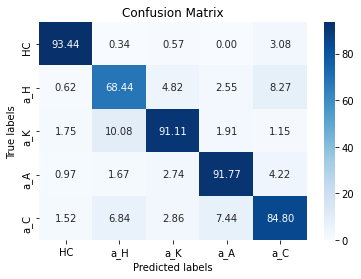

In [ ]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/0fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

In [ ]:
with open("/content/drive/MyDrive/test_data/test_sub_ID.pickle", mode="rb") as f:
   sub_ID = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/pickle/metadata.pickle", mode="rb") as f:
   metadata = pickle.load(f)
f.close()
metadata = np.array(metadata)
metadata = metadata[1:, ::]

In [ ]:
metadata

array([['1', '29885', 'HC', ..., '0', '0', '1'],
       ['1', '29886', 'HC', ..., '0', '0', '1'],
       ['1', '29888', 'HC', ..., '0', '0', '1'],
       ...,
       ['2392', '15541', 'A', ..., '0', '0', '1'],
       ['2392', '15603', 'A', ..., '0', '0', '1'],
       ['2392', '15666', 'A', ..., '0', '0', '1']], dtype='<U20')

In [ ]:
for i in range(458):
  print(predict_classes[misclassified_H_class_sample_index][i], test_sub_ID[misclassified_H_class_sample_index][i])

In [ ]:
test_sub_ID = sub_ID[test_index]
misclassified_sample_index = np.where(true_classes != predict_classes)[0]
H_class_sample_index = np.where(true_classes == 1)[0]
misclassified_H_class_sample_index = np.intersect1d(misclassified_sample_index, H_class_sample_index)
# test_sub_ID[misclassified_H_class_sample_index]
missclassified_H_class_sample_sub_ID = np.unique(test_sub_ID[misclassified_H_class_sample_index])
# np.unique(test_sub_ID[misclassified_H_class_sample_index])

# np.where(metadata[::,0].astype(int) == missclassified_H_class_sample_sub_ID)
missclassified_H_class_sample_index = []
for i in range(len(missclassified_H_class_sample_sub_ID)):
  missclassified_H_class_sample_index.append(np.where(metadata[::,0].astype(int) == missclassified_H_class_sample_sub_ID[i])[0][0])

print("CLASS", "AFFECTED_SIDE", "SHOD_CONDITION", "SPEED", "READMISSION", "SESSION_TYPE")
for j in range(len(missclassified_H_class_sample_index)):
  print(metadata[missclassified_H_class_sample_index[j], 2], metadata[missclassified_H_class_sample_index[j], 3], metadata[missclassified_H_class_sample_index[j], 10:-4])

CLASS AFFECTED_SIDE SHOD_CONDITION SPEED READMISSION SESSION_TYPE
H H_F ['0' '1' '0' '2' '0' '1']
H H_C ['0' '1' '0' '2' '0' '1']
H H_P ['2' '1' '0' '2' '0' '1']
H H_F ['1' '1' '0' '2' '0' '1']
H H_F ['0' '1' '0' '2' '0' '1']
H H_PF ['2' '1' '0' '2' '0' '1']
H H_F ['0' '0' '0' '2' '0' '1']
H H_PC ['2' '1' '0' '2' '0' '1']
H H_F ['1' '1' '0' '2' '0' '1']
H H_F ['0' '1' '0' '2' '0' '1']
H H_PC ['0' '1' '0' '2' '0' '1']
H H_C ['0' '1' '0' '2' '0' '1']
H H_C ['0' '0' '0' '2' '0' '1']
H H_P ['2' '1' '0' '2' '0' '2']
H H_F ['1' '1' '0' '2' '0' '1']
H H_P ['1' '1' '0' '2' '0' '1']
H H_C ['0' '1' '0' '2' '0' '1']
H H_P ['1' '1' '0' '2' '0' '1']
H H_F ['0' '1' '0' '2' '0' '1']
H H_P ['2' '1' '0' '2' '0' '1']
H H_C ['1' '0' '0' '2' '0' '1']
H H_C ['1' '1' '0' '2' '0' '1']
H H_C ['1' '1' '0' '2' '1' '3']
H H_F ['0' '1' '0' '2' '0' '1']
H H_C ['0' '1' '0' '2' '0' '1']


In [ ]:
HC_TP_FN = 1754
HC_TN_FP = 1451 + 2519 + 2989 + 2165
HC_TP = 1665
HC_FP = 22 + 10 + 17 + 45
HC_FN = 8 + 17 + 27 + 37
HC_TN = HC_TN_FP - HC_FP
acc_HC = (HC_TN + HC_TP)/(HC_TP_FN + HC_TN_FP)
HC_recall = HC_TP / HC_TP_FN
HC_fp_rate = HC_FP / HC_TN_FP
HC_fn_rate = HC_FN / HC_TP_FN
HC_IR = HC_TP_FN / HC_TN_FP
print("HC")
print("IR", HC_IR)
print("TP rate = recall", HC_recall)
print("FP rate", HC_fp_rate)
print("FN rate", HC_fn_rate)
# print("TN rate", HC_TN)
print("accracy", acc_HC)

H_TP_FN = 1451
H_TN_FP = 1754 + 2519 + 2989 + 2165
H_TP = 1045
H_FP = 8 + 72 + 52 + 71
H_FN = 22 + 242 + 33 + 109
H_TN = H_TN_FP - H_FP
acc_H = (H_TN + H_TP)/(H_TP_FN + H_TN_FP)
H_recall = H_TP / H_TP_FN
H_fp_rate = H_FP / H_TN_FP
H_fn_rate = H_FN / H_TP_FN
H_IR = H_TP_FN / H_TN_FP
print("H")
print("IR", H_IR)
print("TP rate = recall", H_recall)
print("FP rate", H_fp_rate)
print("FN rate", H_fn_rate)
# print("TN rate", H_TN)
print("accracy", acc_H)

K_TP_FN = 2519
K_TN_FP = 1754 + 1451 + 2989 + 2165
K_TP = 2297
K_FP = 17 + 242 + 65 + 21
K_FN = 10 + 72 + 98 + 42
K_TN = K_TN_FP - K_FP
acc_K = (K_TN + K_TP)/(K_TP_FN + K_TN_FP)
K_recall = K_TP / K_TP_FN
K_fp_rate = K_FP / K_TN_FP
K_fn_rate = K_FN / K_TP_FN
K_IR = K_TP_FN / K_TN_FP
print("K")
print("IR", K_IR)
print("TP rate = recall", K_recall)
print("FP rate", K_fp_rate)
print("FN rate", K_fn_rate)
# print("TN rate", K_TN)
print("accracy", acc_K)

A_TP_FN = 2989
A_TN_FP = 1754 + 1451 + 2519 + 2165
A_TP = 2748
A_FP = 27 + 33 + 98 + 153
A_FN = 17 + 52 + 65 + 107
A_TN = A_TN_FP - A_FP
acc_A = (A_TN + A_TP)/(A_TP_FN + A_TN_FP)
A_recall = A_TP / A_TP_FN
A_fp_rate = A_FP / A_TN_FP
A_fn_rate = A_FN / A_TP_FN
A_IR = A_TP_FN / A_TN_FP
print("A")
print("IR", A_IR)
print("TP rate = recall", A_recall)
print("FP rate", A_fp_rate)
print("FN rate", A_fn_rate)
# print("TN rate", A_TN)
print("accracy", acc_A)

C_TP_FN = 2165
C_TN_FP = 1754 + 1451 + 2519 + 2989
C_TP = 1875
C_FP = 37 + 109 + 42 + 107
C_FN = 45 + 71 + 21 + 153
C_TN = C_TN_FP - C_FP
acc_C = (C_TN + C_TP)/(C_TP_FN + C_TN_FP)
C_recall = C_TP / C_TP_FN
C_fp_rate = C_FP / C_TN_FP
C_fn_rate = C_FN / C_TP_FN
C_IR = C_TP_FN / C_TN_FP
print("C")
print("IR", C_IR)
print("TP rate = recall", C_recall)
print("FP rate", C_fp_rate)
print("FN rate", C_fn_rate)
# print("TN rate", C_TN)
print("accracy", acc_C)

HC_precision = HC_TP/(HC_TP + HC_FP)
H_precision = H_TP/(H_TP + H_FP)
K_precision = K_TP/(K_TP + K_FP)
A_precision = A_TP/(A_TP + A_FP)
C_precision = C_TP/(C_TP + C_FP)

HC
IR 0.19224024550635685
TP rate = recall 0.9492588369441277
FP rate 0.010302498903989479
FN rate 0.05074116305587229
accracy 0.983177054605626
H
IR 0.15391959265938263
TP rate = recall 0.7201929703652653
FP rate 0.02153389201230508
FN rate 0.27980702963473464
accracy 0.944015444015444
K
IR 0.3013518363440603
TP rate = recall 0.9118697895990472
FP rate 0.04127287953104438
FN rate 0.08813021040095276
accracy 0.9478764478764479
A
IR 0.37888198757763975
TP rate = recall 0.9193710270993644
FP rate 0.039421979972113066
FN rate 0.08062897290063567
accracy 0.9492553778268064
C
IR 0.2484792838287616
TP rate = recall 0.8660508083140878
FP rate 0.03385745437851486
FN rate 0.13394919168591224
accracy 0.9462217319360177


In [ ]:
import numpy as np

HC_g_mean = np.sqrt(HC_recall*HC_fp_rate)
H_g_mean = np.sqrt(H_recall*H_fp_rate)
K_g_mean = np.sqrt(K_recall*K_fp_rate)
A_g_mean = np.sqrt(A_recall*A_fp_rate)
C_g_mean = np.sqrt(C_recall*C_fp_rate)

print("HC_miscost", HC_IR * np.exp(- HC_g_mean / 2) * np.exp(- acc_HC / 2))
print("H_miscost",H_IR * np.exp(- H_g_mean / 2) * np.exp(- acc_H / 2))
print("K_miscost",K_IR * np.exp(- K_g_mean / 2) * np.exp(- acc_K / 2))
print("A_miscost",A_IR * np.exp(- A_g_mean / 2) * np.exp(- acc_A / 2))
print("C_miscost",C_IR * np.exp(- C_g_mean / 2) * np.exp(- acc_C / 2))
print("")
print("HC_miscost without IR", np.exp(- HC_g_mean / 2) * np.exp(- acc_HC / 2))
print("H_miscost without IR", np.exp(- H_g_mean / 2) * np.exp(- acc_H / 2))
print("K_miscost without IR", np.exp(- K_g_mean / 2) * np.exp(- acc_K / 2))
print("A_miscost without IR", np.exp(- A_g_mean / 2) * np.exp(- acc_A / 2))
print("C_miscost without IR", np.exp(- C_g_mean / 2) * np.exp(- acc_C / 2))
print("")
print("HC_miscost without negative", HC_IR * np.exp(HC_g_mean / 2) * np.exp(acc_HC / 2))
print("H_miscost without negative",H_IR * np.exp(H_g_mean / 2) * np.exp(acc_H / 2))
print("K_miscost without negative",K_IR * np.exp(K_g_mean / 2) * np.exp(acc_K / 2))
print("A_miscost without negative",A_IR * np.exp(A_g_mean / 2) * np.exp(acc_A / 2))
print("C_miscost without negative",C_IR * np.exp(C_g_mean / 2) * np.exp(acc_C / 2))
print("")
print("HC_miscost without IR and negative", np.exp( HC_g_mean / 2) * np.exp( acc_HC / 2))
print("H_miscost without IR and negative", np.exp( H_g_mean / 2) * np.exp(acc_H / 2))
print("K_miscost without IR and negative", np.exp( K_g_mean / 2) * np.exp( acc_K / 2))
print("A_miscost without IR and negative", np.exp( A_g_mean / 2) * np.exp( acc_A / 2))
print("C_miscost without IR and negative", np.exp( C_g_mean / 2) * np.exp( acc_C / 2))
print("")
HC_g_mean = np.sqrt(HC_recall*HC_fn_rate)
H_g_mean = np.sqrt(H_recall*H_fn_rate)
K_g_mean = np.sqrt(K_recall*K_fn_rate)
A_g_mean = np.sqrt(A_recall*A_fn_rate)
print("HC_miscost", HC_IR * np.exp(- HC_g_mean / 2) * np.exp(- acc_HC / 2))
print("H_miscost",H_IR * np.exp(- H_g_mean / 2) * np.exp(- acc_H / 2))
print("K_miscost",K_IR * np.exp(- K_g_mean / 2) * np.exp(- acc_K / 2))
print("A_miscost",A_IR * np.exp(- A_g_mean / 2) * np.exp(- acc_A / 2))
print("C_miscost",C_IR * np.exp(- C_g_mean / 2) * np.exp(- acc_C / 2))
print("")
print("HC_miscost without IR", np.exp(- HC_g_mean / 2) * np.exp(- acc_HC / 2))
print("H_miscost without IR", np.exp(- H_g_mean / 2) * np.exp(- acc_H / 2))
print("K_miscost without IR", np.exp(- K_g_mean / 2) * np.exp(- acc_K / 2))
print("A_miscost without IR", np.exp(- A_g_mean / 2) * np.exp(- acc_A / 2))
print("C_miscost without IR", np.exp(- C_g_mean / 2) * np.exp(- acc_C / 2))
print("")
print("HC_miscost without negative", HC_IR * np.exp(HC_g_mean / 2) * np.exp(acc_HC / 2))
print("H_miscost without negative",H_IR * np.exp(H_g_mean / 2) * np.exp(acc_H / 2))
print("K_miscost without negative",K_IR * np.exp(K_g_mean / 2) * np.exp(acc_K / 2))
print("A_miscost without negative",A_IR * np.exp(A_g_mean / 2) * np.exp(acc_A / 2))
print("C_miscost without negative",C_IR * np.exp(C_g_mean / 2) * np.exp(acc_C / 2))
print("")
print("HC_miscost without IR and negative", np.exp( HC_g_mean / 2) * np.exp( acc_HC / 2))
print("H_miscost without IR and negative", np.exp( H_g_mean / 2) * np.exp(acc_H / 2))
print("K_miscost without IR and negative", np.exp( K_g_mean / 2) * np.exp( acc_K / 2))
print("A_miscost without IR and negative", np.exp( A_g_mean / 2) * np.exp( acc_A / 2))
print("C_miscost without IR and negative", np.exp( C_g_mean / 2) * np.exp( acc_C / 2))
print("")
print("HC recall", HC_recall)
print("H recall", H_recall)
print("K recall", K_recall)
print("A recall", A_recall)
print("C recall", C_recall)
print("")
print("HC FP rate", HC_fp_rate)
print("H FP rate", H_fp_rate)
print("K FP rate", K_fp_rate)
print("A FP rate", A_fp_rate)
print("C FP rate", C_fp_rate)
print("")
print("HC FN rate", HC_fn_rate)
print("H FN rate", H_fn_rate)
print("K FN rate", K_fn_rate)
print("A FN rate", A_fn_rate)
print("C FN rate", C_fn_rate)
print("")
print("HC_IR", HC_IR)
print("H_IR", H_IR)
print("K_IR", K_IR)
print("A_IR", A_IR)
print("C_IR", C_IR)
print("")
print("HC_miscost without IR and negative", np.exp( HC_fn_rate / 2) * np.exp( (1-HC_recall) / 2))
print("H_miscost without IR and negative", np.exp( H_fn_rate / 2) * np.exp( (1-H_recall) / 2))
print("K_miscost without IR and negative", np.exp( K_fn_rate / 2) * np.exp( (1-K_recall) / 2))
print("A_miscost without IR and negative", np.exp( A_fn_rate / 2) * np.exp( (1-A_recall) / 2))
print("C_miscost without IR and negative", np.exp( C_fn_rate / 2) * np.exp( (1-C_recall) / 2))
print("")
print("HC precision", HC_precision)
print("H precision", H_precision)
print("K precision", K_precision)
print("A precision", A_precision)
print("C precision", C_precision)
print("")
HC_f1 = (2*HC_precision*HC_recall)/(HC_precision+HC_recall)
H_f1 = (2*H_precision*H_recall)/(H_precision+H_recall)
K_f1 = (2*K_precision*K_recall)/(K_precision+K_recall)
A_f1 = (2*A_precision*A_recall)/(A_precision+A_recall)
C_f1 = (2*C_precision*C_recall)/(C_precision+C_recall)
print("HC f1", HC_f1)
print("H f1", H_f1)
print("K f1", K_f1)
print("A f1", A_f1)
print("C f1", C_f1)
print("")
print("HC_miscost without IR and negative", np.exp( HC_fn_rate / 2) * np.exp( (1-HC_f1) / 2))
print("H_miscost without IR and negative", np.exp( H_fn_rate / 2) * np.exp( (1-H_f1) / 2))
print("K_miscost without IR and negative", np.exp( K_fn_rate / 2) * np.exp( (1-K_f1) / 2))
print("A_miscost without IR and negative", np.exp( A_fn_rate / 2) * np.exp( (1-A_f1) / 2))
print("C_miscost without IR and negative", np.exp( C_fn_rate / 2) * np.exp( (1-C_f1) / 2))
print("Exception", np.exp( 0 / 2) * np.exp( (1-0) / 2))

In [ ]:
print(np.exp(-1/2))
print(np.exp(-1.5/2))
print(np.exp(1/2))
print(np.exp(1.5/2))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_2 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_12 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1553    9   25   29  138]
 [  25 1017  200   30  179]
 [  20  122 2231   99   47]
 [  63   32   81 2478  335]
 [ 131  110   11  150 1763]]
              precision    recall  f1-score   support

          HC    0.86663   0.88540   0.87592      1754
         a_H    0.78837   0.70090   0.74206      1451
         a_K    0.87559   0.88567   0.88060      2519
         a_A    0.88945   0.82904   0.85818      2989
         a_C    0.71608   0.81432   0.76205      2165

    accuracy                        0.83122     10878
   macro avg    0.82722   0.82307   0.82376     10878
weighted avg    0.83457   0.83122   0.83161     10878



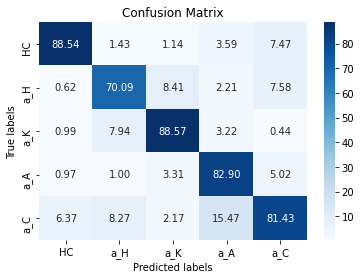

In [15]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/1fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_3 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_18 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1698    0    8   11   37]
 [  25 1029  248   32  117]
 [  19  164 2229   61   46]
 [ 112   34   10 2553  280]
 [  92  105   29   95 1844]]
              precision    recall  f1-score   support

          HC    0.87256   0.96807   0.91784      1754
         a_H    0.77252   0.70917   0.73949      1451
         a_K    0.88312   0.88487   0.88400      2519
         a_A    0.92769   0.85413   0.88939      2989
         a_C    0.79346   0.85173   0.82156      2165

    accuracy                        0.85981     10878
   macro avg    0.84987   0.85360   0.85046     10878
weighted avg    0.86107   0.85981   0.85923     10878



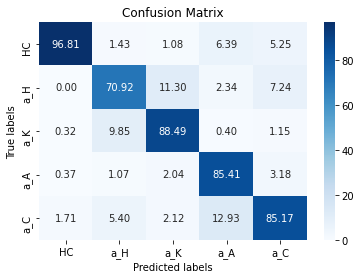

In [16]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/2fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_4 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_24 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 101, 1024)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1657    0    8   28   61]
 [  34 1039  240   24  114]
 [  17   97 2241  111   53]
 [   0  106   60 2695  128]
 [  35  156   10  128 1836]]
              precision    recall  f1-score   support

          HC    0.95066   0.94470   0.94767      1754
         a_H    0.74320   0.71606   0.72938      1451
         a_K    0.87573   0.88964   0.88263      2519
         a_A    0.90255   0.90164   0.90209      2989
         a_C    0.83759   0.84804   0.84278      2165

    accuracy                        0.87038     10878
   macro avg    0.86195   0.86001   0.86091     10878
weighted avg    0.86991   0.87038   0.87009     10878



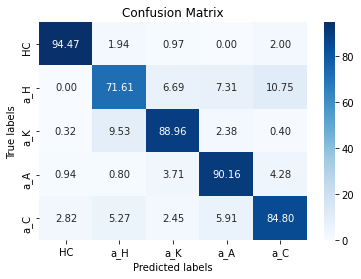

In [17]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/3fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_6 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_36 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_30 (Batc (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1706    0    0   21   27]
 [  59 1033  255   15   89]
 [  28  112 2272   83   24]
 [  62   49   64 2626  188]
 [  74  120   11   80 1880]]
              precision    recall  f1-score   support

          HC    0.88440   0.97263   0.92642      1754
         a_H    0.78615   0.71192   0.74720      1451
         a_K    0.87317   0.90195   0.88733      2519
         a_A    0.92956   0.87855   0.90334      2989
         a_C    0.85145   0.86836   0.85982      2165

    accuracy                        0.87489     10878
   macro avg    0.86495   0.86668   0.86482     10878
weighted avg    0.87454   0.87489   0.87386     10878



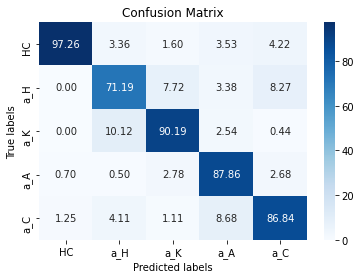

In [19]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/4fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_7 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_42 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_35 (Batc (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1717    0    9   10   18]
 [  14 1005  271   48  113]
 [  19   44 2343   73   40]
 [  48   76   73 2626  166]
 [  65  140   49  134 1777]]
              precision    recall  f1-score   support

          HC    0.92163   0.97891   0.94941      1754
         a_H    0.79447   0.69263   0.74006      1451
         a_K    0.85355   0.93013   0.89020      2519
         a_A    0.90834   0.87855   0.89320      2989
         a_C    0.84059   0.82079   0.83057      2165

    accuracy                        0.87038     10878
   macro avg    0.86371   0.86020   0.86069     10878
weighted avg    0.86912   0.87038   0.86867     10878



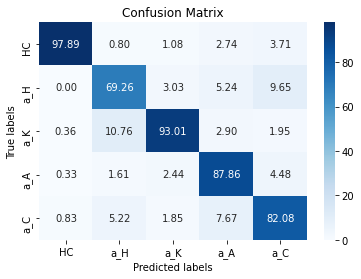

In [20]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/5fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 101, 1024)         2121728   
_________________________________________________________________
layer_normalization_8 (Layer (None, 101, 1024)         2048      
_________________________________________________________________
activation_48 (Activation)   (None, 101, 1024)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 101, 1024)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 103424)            0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               52953600  
_________________________________________________________________
batch_normalization_40 (Batc (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1710    0    8   28    8]
 [  59  995  231   53  113]
 [   0  112 2267   96   44]
 [  17   36   59 2712  165]
 [  93  121   39  116 1796]]
              precision    recall  f1-score   support

          HC    0.91006   0.97491   0.94137      1754
         a_H    0.78718   0.68573   0.73297      1451
         a_K    0.87058   0.89996   0.88503      2519
         a_A    0.90250   0.90733   0.90490      2989
         a_C    0.84478   0.82956   0.83710      2165

    accuracy                        0.87148     10878
   macro avg    0.86302   0.85950   0.86027     10878
weighted avg    0.86946   0.87148   0.86975     10878



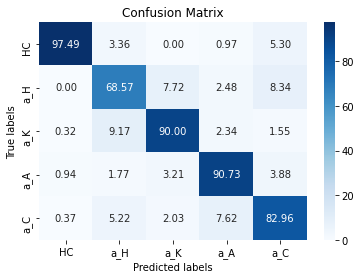

In [21]:
# test 
model = build_model()
model.load_weights('/content/drive/MyDrive/saved_models/checkpoints/6fold_practice_original_cost_sensitive_LSTM.h5')
model.compile(loss='categorical_crossentropy', 
          optimizer= optimizers.Adam(lr=1e-5, beta_1= 0.9, beta_2= 0.999),
          metrics=['accuracy']
          )
  # 混合行列
predict_prob = model.predict(test_x)
predict_classes=np.argmax(predict_prob,axis=1)
true_classes = test_y
cmx = confusion_matrix(true_classes, predict_classes)
cmx_list.append(cmx)
print(cmx)

index = ["HC", "a_H", "a_K", "a_A", "a_C"]

report = classification_report(true_classes, predict_classes, target_names=index, digits= 5)
report_list.append(report)
print(report)

cmx_data = []
for i in range(len(cmx)):
  for j in range(len(cmx)): 
    cmx_data.append((cmx[j, i] / np.sum(cmx[i])))

cmx_data = np.array(cmx_data).reshape(classes_main, classes_main)

ax= plt.subplot()
sns.heatmap(cmx_data*100, annot=True, ax = ax, fmt="1.2f", cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(index) 
ax.yaxis.set_ticklabels(index)
plt.show()